<div align="center">

### TALLER #1 SEÑALES Y SISTEMAS - 2025 2S
#### Estudiante: Martín Ramírez Espinosa
##### Departamento de Ingeniería Eléctrica, Electrónica y Computación
##### Universidad Nacional de Colombia - Sede Manizales

</div>

<a href="https://colab.research.google.com/github/AlmondSund/SyS_2025_2/blob/main/Taller1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Nivelación Python

- Realizar y aprobar los cursos Intro to Programming y Python de Kaggle:

<div>
  <strong>Certificado Intro to Programming:</strong><br>
  <img src="Martín Ramírez Espinosa - Intro to Programming.png" alt="Intro to Programming Certificate" width="400">
  <br><strong>Certificado Python:</strong><br>
  <img src="Martín Ramírez Espinosa - Python.png" alt="Python Certificate" width="400">
</div>

- Consultar y realizar los ejercicios de los cuadernos 1 al 8 del repositorio Python Basics.

1.1. Variables

Write a program that displays the result of the following arithmetic operation on the screen: $x(t) = \left(\frac{3+2}{2.5}\right)^2$

In [4]:
x_t = ((3 + 2) / (2 * 5)) ** 2
x_t

0.25

Write a program that asks the user for the number of hours worked and the hourly rate. Then, it should display on the screen the corresponding payment.

In [5]:
num_hours_worked = int(input("Enter the number of hours worked: "))
hourly_rate = float(input("Enter the hourly rate: "))
weekly_salary = num_hours_worked * hourly_rate
print("Weekly salary:", weekly_salary)

Weekly salary: 10.0


Write a program that asks the user for their weight (in kg) and height (in meters), calculates the body mass index (BMI), stores it in a variable, and displays the message "Your body mass index is imc" on the screen, where imc is the calculated BMI rounded to two decimal places.

In [ ]:
weight_kg = float(input("Enter your weight in kilograms: "))
height_m = float(input("Enter your height in meters: "))
bmi = weight_kg / (height_m ** 2)
print("Your BMI is:", bmi)

1.2. Conditionals

In order to pay a certain tax, you must be over 16 years old and have a monthly income equal to or greater than €1000. Write a program that asks the user for their age and monthly income, and displays whether the user has to pay the tax or not.

In [ ]:
usr_age_years = int(input("Enter your age (years): "))
usr_income_euros = float(input("Enter your monthly income (euros): "))
if usr_age_years > 16 and usr_income_euros >= 1000:
    print("You have to pay the tax.")
else:
    print("You do not have to pay the tax.")

The Bella Napoli pizzeria offers vegetarian and non-vegetarian pizzas to its customers. The ingredients for each type of pizza are as follows:

Vegetarian ingredients: Bell peppers and tofu.

Non-vegetarian ingredients: Pepperoni, Ham, and Salmon.

Write a program that asks the user if they want a vegetarian pizza or not, and based on their response, displays a menu with the available ingredients for them to choose from. Only one additional ingredient can be chosen besides the mozzarella and tomato, which are included in all pizzas. Finally, the program should display whether the chosen pizza is vegetarian or not, along with all the ingredients it contains.

In [ ]:
print("Welcome to Bella Napoli Pizzeria!")
is_vegetarian = input("Do you want a vegetarian pizza? (Y/N): ").strip().upper()

if is_vegetarian == 'Y':
    print("Available vegetarian ingredients: 1. Bell peppers 2. Tofu")
    choice = input("Choose one ingredient (1 or 2): ").strip()
    if choice == '1':
        ingredient = "Bell peppers"
    elif choice == '2':
        ingredient = "Tofu"
    else:
        ingredient = "No additional ingredient"
    pizza_type = "Vegetarian"

elif is_vegetarian == 'N':
    print("Available non-vegetarian ingredients: 1. Pepperoni 2. Ham 3. Salmon")
    choice = input("Choose one ingredient (1, 2, or 3): ").strip()
    if choice == '1':
        ingredient = "Pepperoni"
    elif choice == '2':
        ingredient = "Ham"
    elif choice == '3':
        ingredient = "Salmon"
    else:
        ingredient = "No additional ingredient"
    pizza_type = "Non-Vegetarian"

else:
    pizza_type = "Unknown"
    ingredient = "No additional ingredient"

print("You have ordered a", pizza_type, "pizza with the following ingredients:")
print("Mozzarella")
print("Tomato")
print(ingredient)

Welcome to Bella Napoli Pizzeria!
Available vegetarian ingredients: 1. Bell peppers 2. Tofu
You have ordered a Vegetarian pizza with the following ingredients:
Mozzarella
Tomato
Tofu


1.3. Loops

Write a code that ask the user to enter an integer number every time, and the process will be repeated with more numbers until the user enters a zero.
At the end (when the zero is entered), show the amount of numbers entered.

In [ ]:
count = 0
while True:
    number = int(input("Enter an integer number (0 to stop): "))
    if number == 0:
        break
    count += 1
print("Total numbers entered:", count)

- Consultar y realizar los ejercicios propuestos en el cuaderno de Colab: 1_IntroNumpy_SyS.ipynb

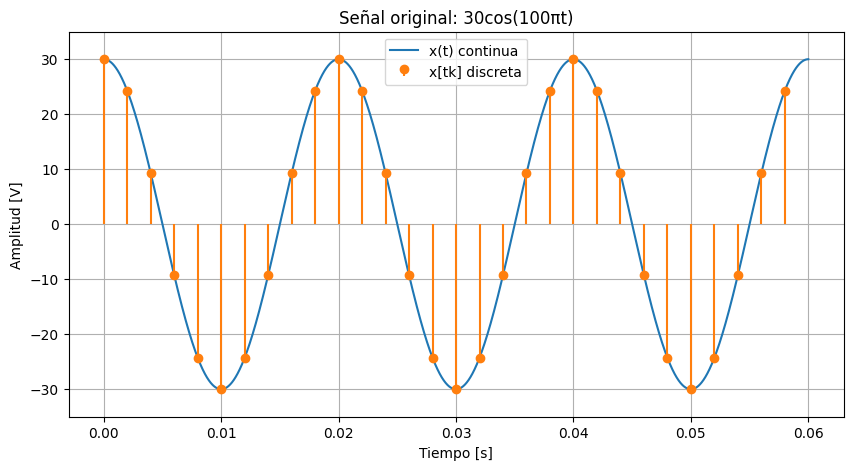

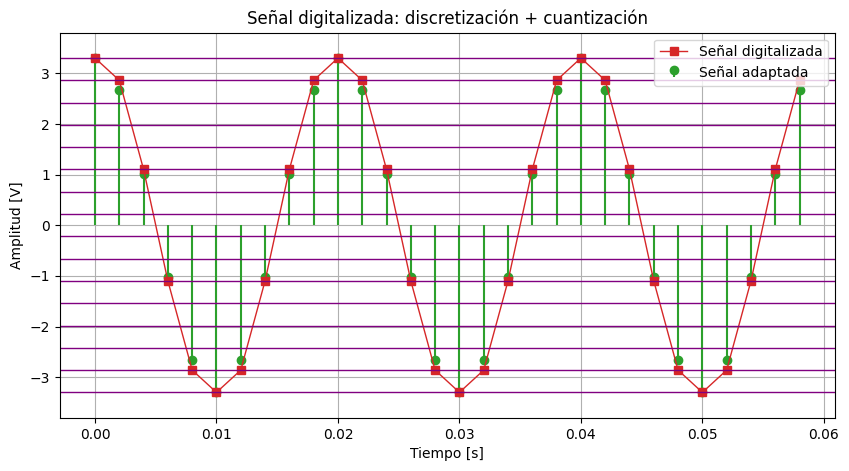

In [1]:
"""
4. Discretización de señales
=========================================================
Se tiene un microprocesador de 4 bits con entrada análoga
entre -3.3 y 3.3 [V]. Describa las condiciones necesarias
para que el microprocesador pueda digitalizar la señal

x(t) = 30cos(100πt).

Presente una simulación en Python de dicho proceso para
tres ciclos de la señal x(t).
"""
import numpy as np
import matplotlib.pyplot as plt

"""Parámetros de la señal"""
A = 30.0      # Amplitud [V]
Fo = 50.0     # Frecuencia [Hz] (100π rad/s => 50 Hz)
To = 1.0/Fo   # Periodo [s]

"""Muestreo"""
Fs = 10*Fo    # Frecuencia de muestreo [Hz], por Teorema de Nyquist (Fs > 2*Fo)
Ts = 1.0/Fs   # Periodo de muestreo [s]

"""Tiempos [s]"""
sim_time = 3*To                     # Tiempo de simulación (3 ciclos)
t = np.linspace(0, sim_time, 20000) # Tiempo continuo
t_k = np.arange(0, sim_time, Ts)    # Tiempo discreto

"""Señal original [V]"""
x_t = A*np.cos(2*np.pi*Fo*t)        # Señal continua
x_tk = A*np.cos(2*np.pi*Fo*t_k)     # Señal muestreada

"""Parámetros del A/D"""
V_min, V_max = -3.3, 3.3    # Rango de voltaje del A/D [V]
n_bits = 4                  # Número de bits del A/D
num_levels = 2**n_bits      # Número de niveles de cuantización

"""Adaptación de la señal para que entre en el rango del A/D"""
gain = V_max/A                  # Pendiente de la recta de adaptación [V/V]
offset = (V_max + V_min) / 2    # Cero de la recta de adaptación [V]
x_tk_adj = gain*x_tk + offset   # Señal adaptada [V]

"""Cuantización"""
levels = np.linspace(V_min, V_max, num_levels)            # Niveles de cuantización
distances = np.abs(x_tk_adj[:, None] - levels[None, :])   # Matriz que contiene todas las distancias a cada nivel
indices = np.argmin(distances, axis=1)                    # Mínima distancia por cada fila (axis=1 -> filas)
x_tk_q = levels[indices]                                  # Señal digitalizada

"""Visualización"""
# Gráfica 1: Señal original continua y discreta
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label='x(t) continua', color='C0')
plt.stem(t_k, x_tk, label='x[tk] discreta', linefmt='C1-', markerfmt='C1o', basefmt=" ")
plt.title('Señal original: 30cos(100πt)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(-35, 35)
plt.grid()
plt.legend()
plt.show()

# Gráfica 2: Señal adaptada, cuantizada y niveles de cuantización (A/D)
plt.figure(figsize=(10, 5))
plt.stem(t_k, x_tk_adj, label='Señal adaptada', linefmt='C2-', markerfmt='C2o', basefmt=" ")
plt.plot(t_k, x_tk_q, label='Señal digitalizada', color='C3', marker='s', linestyle='-', linewidth=1)
# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)
plt.title('Señal digitalizada: discretización + cuantización')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.ylim(V_min-0.5, V_max+0.5)
plt.grid()
plt.legend()
plt.show()

- Consultar y realizar los ejercicios propuestos en el cuaderno de Colab: 2_Señales_estandar.ipynb

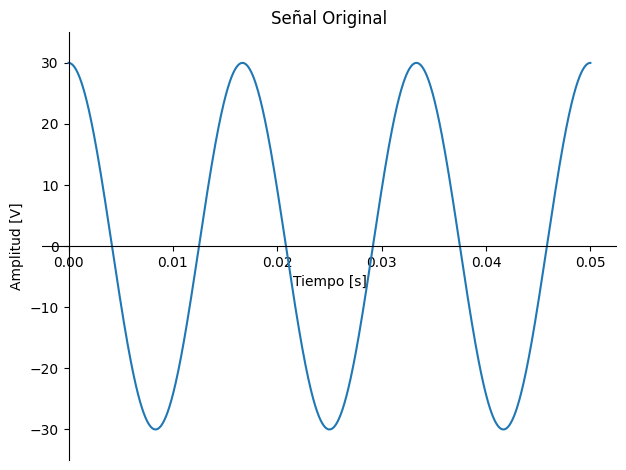

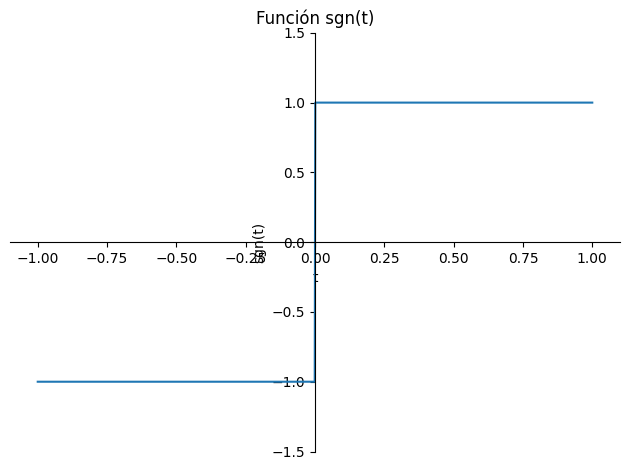

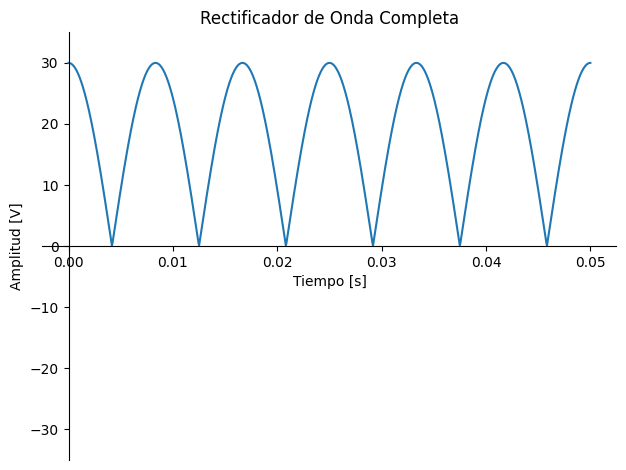

A*cos(2*pi*F*t)*sign(cos(2*pi*F*t))

In [2]:
"""
Ejercicio:
Genere un rectificador de onda completa utilizando la función sgn(t)
"""
# Importar sympy
import sympy as sp

# Definir variables simbólicas
t = sp.symbols('t', real=True)
A, F = sp.symbols('A F', real=True, positive=True)

# Señal original
x_t = A * sp.cos(2 * sp.pi * F * t)
sp.plot(x_t.subs({A: 30, F: 60}), (t, 0, 0.05), title='Señal Original', ylabel='Amplitud [V]', xlabel='Tiempo [s]', ylim=(-35, 35))

# Función sgn(t)
sp.plot(sp.sign(t), (t, -1, 1), title='Función sgn(t)', ylabel='sgn(t)', xlabel='t', ylim=(-1.5, 1.5))

# Señal rectificada
abs_x_t = x_t * sp.sign(x_t)

# Graficar la señal rectificada
sp.plot(abs_x_t.subs({A: 30, F: 60}), (t, 0, 0.05), title='Rectificador de Onda Completa', ylabel='Amplitud [V]', xlabel='Tiempo [s]', ylim=(-35, 35))

# Mostrar la expresión simbólica
abs_x_t
